# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words  = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import requests
import pickle


In [2]:
!pip install wordcloud

# Data Preprocessing


In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


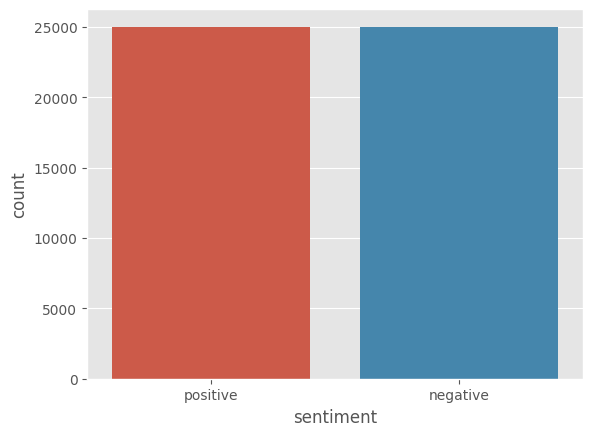

In [4]:
sns.countplot(x='sentiment',data=df)
plt.show()

In [30]:
df = df.sample(10000)

In [5]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [33]:
df=df.reset_index(drop=True)

In [7]:
df['sentiment']=df['sentiment'].map({'negative':0,'positive':1})

In [8]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [9]:
df['review'] = df['review'].apply(clean_html)

In [10]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [11]:
def to_lower(text):
    return text.lower()

In [12]:
df['review'] = df['review'].apply(to_lower)

In [13]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [14]:
def remove_special(text):
    x=''
    
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x = x + ' '
    return x

In [15]:
df['review'] = df['review'].apply(remove_special)

In [16]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production  the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s  love in the time of money  is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot  bad dialogue  bad acting  idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [17]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
def remove_stopwords(text):
    x=[]
    
    for i in text.split():
        if i not in stop_words:
            x.append(i)
    y=x[:]
    x.clear()
    
    return y
            

In [19]:
df['review'] = df['review'].apply(remove_stopwords)

In [20]:
ps = PorterStemmer()
y=[]
def stem_text(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    
    return z

In [21]:
df['review'] = df['review'].apply(stem_text)

In [22]:
def join_back(list_input):
    return ' '.join(list_input)

In [23]:
df['review'] = df['review'].apply(join_back)

# Model Training

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english',use_idf=True,lowercase=True, strip_accents='ascii')

In [31]:
X = tf.fit_transform(df['review']).toarray()

In [34]:
df

,review,sentiment
0,hollywood offici gone far realli hope travesti...,0
1,happi go love two thing go two thing vera elle...,0
2,thought choke potenti thought could much bette...,0
3,start good sketch comedi first show good look ...,0
4,happen upon film accid realli enjoy timothi bu...,1
...,...,...
9995,film must shot day scene see camera reflect re...,0
9996,lissen guy love film though quit much farewel ...,1
9997,okay tell real list screenwrit director one vi...,0
9998,saw big trail vienna filmmuseum first time imm...,1


In [35]:
x = df.iloc[:,0:1].values
y=df.iloc[:,1:].values

In [48]:
pickle.dump(tf,open('transform.pkl','wb'))

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
clf2 = MultinomialNB()

In [41]:
clf2.fit(X_train,Y_train)

C:\Users\Scott Fernandes\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [42]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
y_pred2 = clf2.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print(accuracy_score(y_pred2,Y_test))

0.8566666666666667


In [46]:
y_pred2[0]

1

In [47]:
pickle.dump(clf2,open('nlp.pkl','wb'))